In [1]:
%matplotlib inline

import time
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from robotics import Robot, reset, release

reset()

robot = Robot()

Simulation stopped...
Simulation started...
Connected to remoteApi server.
 Pioneer_p3dx_ultrasonicSensor1 connected.
 Pioneer_p3dx_ultrasonicSensor2 connected.
 Pioneer_p3dx_ultrasonicSensor3 connected.
 Pioneer_p3dx_ultrasonicSensor4 connected.
 Pioneer_p3dx_ultrasonicSensor5 connected.
 Pioneer_p3dx_ultrasonicSensor6 connected.
 Pioneer_p3dx_ultrasonicSensor7 connected.
 Pioneer_p3dx_ultrasonicSensor8 connected.
 Pioneer_p3dx_ultrasonicSensor9 connected.
 Pioneer_p3dx_ultrasonicSensor10 connected.
 Pioneer_p3dx_ultrasonicSensor11 connected.
 Pioneer_p3dx_ultrasonicSensor12 connected.
 Pioneer_p3dx_ultrasonicSensor13 connected.
 Pioneer_p3dx_ultrasonicSensor14 connected.
 Pioneer_p3dx_ultrasonicSensor15 connected.
 Pioneer_p3dx_ultrasonicSensor16 connected.
 Vision sensor connected.
 Laser connected.
 Left motor connected.
 Right motor connected.
 Robot connected.


**Reading ultrasonic sensors**

In [3]:
help(Robot.read_ultrasonic_sensors)

Help on function read_ultrasonic_sensors in module robotics.p3dx:

read_ultrasonic_sensors(self)
    Reads the distances from the 16 ultrasonic sensors.
    Returns:
        distances: List with the distances in meters.



In [4]:
ultrasonic = robot.read_ultrasonic_sensors()
print("Ultrasonic :", ultrasonic)

Ultrasonic : [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 0.5883663892745972, 0.4595743715763092, 0.4455883204936981, 5.0, 5.0, 5.0, 5.0]


In [5]:
len(ultrasonic)

16

In [6]:
type(ultrasonic[0])

float

**Reading laser sensor**

In [7]:
help(Robot.read_laser)

Help on function read_laser in module robotics.p3dx:

read_laser(self)
    Gets the 572 points read by the laser sensor. Each reading contains 3 values (x, y, z) of the point relative to the sensor position.
    Returns:
        laser: List with 1716 values of x, y and z from each point.



In [8]:
laser = robot.read_laser()
print("Laser (10) :", laser[:30])

Laser (10) : [-2.414828300476074, -4.182604789733887, 0.06299993395805359, -2.38266658782959, -4.186064720153809, 0.06299993395805359, -2.3510639667510986, -4.19019889831543, 0.06299993395805359, -2.310744047164917, -4.178267955780029, 0.06299993395805359, -2.2802398204803467, -4.1835784912109375, 0.06299993395805359, -2.250264883041382, -4.189615249633789, 0.06299993395805359, -2.211644411087036, -4.179083824157715, 0.06299992650747299, -2.1826322078704834, -4.186253547668457, 0.06299992650747299, -2.1450998783111572, -4.176644325256348, 0.06299992650747299, -2.1169698238372803, -4.184922218322754, 0.06299992650747299]


In [9]:
len(laser)

1239

In [10]:
len(laser) // 3

413

In [11]:
type(laser[0])

float

**Reading camera**

In [12]:
help(Robot.read_vision_sensor)

Help on function read_vision_sensor in module robotics.p3dx:

read_vision_sensor(self)
    Reads the image raw data from vrep vision sensor.
    Returns:
        resolution: Tuple with the image resolution.
        image: List with the image data.



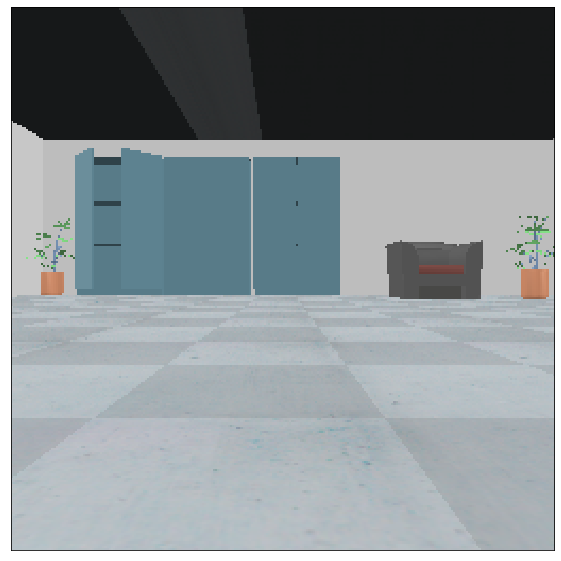

In [13]:
from robotics import vrep2array

resolution, raw_img = robot.read_vision_sensor()
img = vrep2array(raw_img, resolution)

plt.figure(figsize=(20,10))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

**Position and Locomotion**

In [14]:
help(Robot.get_current_position)

Help on function get_current_position in module robotics.p3dx:

get_current_position(self)
    Gives the current robot position on the environment.
    Returns:
        position: Array with the (x,y,z) coordinates.



In [15]:
position = robot.get_current_position()

position

[-2.0253958702087402, -0.8249890208244324, 0.13868042826652527]

In [16]:
help(Robot.get_current_orientation)

Help on function get_current_orientation in module robotics.p3dx:

get_current_orientation(self)
    Gives the current robot orientation on the environment.
    Returns:
        orientation: Array with the euler angles (alpha, beta and gamma).



In [17]:
orientation = robot.get_current_orientation()

orientation

[-8.337745384778827e-05, -0.0020511846523731947, -5.264692663331516e-05]

In [18]:
help(Robot.set_right_velocity)
help(Robot.set_left_velocity)
help(Robot.set_velocity)

Help on function set_right_velocity in module robotics.p3dx:

set_right_velocity(self, vel)
    Sets the velocity on the right motor.
    Args:
        vel: The velocity to be applied in the motor (rad/s)

Help on function set_left_velocity in module robotics.p3dx:

set_left_velocity(self, vel)
    Sets the velocity on the left motor.
    Args:
        vel: The velocity to be applied in the motor (rad/s)

Help on function set_velocity in module robotics.p3dx:

set_velocity(self, V, W)
    Sets a linear and a angular velocity on the robot.
    Args:
        V: Linear velocity (m/s) to be applied on the robot along its longitudinal axis.
        W: Angular velocity (rad/s) to be applied on the robot along its axis of rotation, positive in the counter-clockwise direction.



**Simulation Tuning**

Custom settings.

* Time step = 250ms
* Real-time simulation enabled (w/ 'try catching up')

This settings work better to sync theoretical time and simulation time.

In [19]:
R = robot.WHEEL_RADIUS

R

0.0975

In [20]:
L = robot.ROBOT_WIDTH / 2

L

0.1905

...

*Translation Analysis*

Evaluate the fidelity of the simulation related to expected results from kinematic model.

The case is to move the robot in a straight line for 5 meters in the expected time.

In [21]:
s = 5.0 # meters
w = 1.0 # rads per second

T = s / (w * R) # seconds

T

51.28205128205128

In [22]:
release(robot)
reset()

robot = Robot()

a = np.array(robot.get_current_position())
t0 = time.time()

robot.set_right_velocity(w)
robot.set_left_velocity(w)
time.sleep(T)

t1 = time.time()

b = np.array(robot.get_current_position())
D = np.linalg.norm(a-b)

robot.stop()
time.sleep(0.5)

c = np.array(robot.get_current_position())
D_ = np.linalg.norm(b-c)

print("Position Initial  :", a)
print("Position Final    :", b)
print("Position Stop     :", c)
print("Distance Expected :", s)
print("Distance Actual   :", D)
print("Distance Stop     :", D_)
print("Time Expected     :", T)
print("Time Actual       :", t1 - t0)

Simulation stopped...
Simulation started...
Connected to remoteApi server.
 Pioneer_p3dx_ultrasonicSensor1 connected.
 Pioneer_p3dx_ultrasonicSensor2 connected.
 Pioneer_p3dx_ultrasonicSensor3 connected.
 Pioneer_p3dx_ultrasonicSensor4 connected.
 Pioneer_p3dx_ultrasonicSensor5 connected.
 Pioneer_p3dx_ultrasonicSensor6 connected.
 Pioneer_p3dx_ultrasonicSensor7 connected.
 Pioneer_p3dx_ultrasonicSensor8 connected.
 Pioneer_p3dx_ultrasonicSensor9 connected.
 Pioneer_p3dx_ultrasonicSensor10 connected.
 Pioneer_p3dx_ultrasonicSensor11 connected.
 Pioneer_p3dx_ultrasonicSensor12 connected.
 Pioneer_p3dx_ultrasonicSensor13 connected.
 Pioneer_p3dx_ultrasonicSensor14 connected.
 Pioneer_p3dx_ultrasonicSensor15 connected.
 Pioneer_p3dx_ultrasonicSensor16 connected.
 Vision sensor connected.
 Laser connected.
 Left motor connected.
 Right motor connected.
 Robot connected.
Position Initial  : [-2.02534461 -0.82498825  0.13867822]
Position Final    : [ 2.94288182 -0.82635897  0.13870373]
Posit

In [23]:
release(robot)
reset()

robot = Robot()

a = np.array(robot.get_current_position())
t0 = time.time()

robot.set_right_velocity(w)
robot.set_left_velocity(w)

while True:
    time.sleep(1)
    b = np.array(robot.get_current_position())
    D = np.linalg.norm(a-b)
    if D >= s:
        break

t1 = time.time()

robot.stop()
time.sleep(0.5)

c = np.array(robot.get_current_position())
D_ = np.linalg.norm(b-c)

print("Position Initial  :", a)
print("Position Final    :", b)
print("Position Stop     :", c)
print("Distance Expected :", s)
print("Distance Actual   :", D)
print("Distance Stop     :", D_)
print("Time Expected     :", T)
print("Time Actual       :", t1 - t0)

Simulation stopped...
Simulation started...
Connected to remoteApi server.
 Pioneer_p3dx_ultrasonicSensor1 connected.
 Pioneer_p3dx_ultrasonicSensor2 connected.
 Pioneer_p3dx_ultrasonicSensor3 connected.
 Pioneer_p3dx_ultrasonicSensor4 connected.
 Pioneer_p3dx_ultrasonicSensor5 connected.
 Pioneer_p3dx_ultrasonicSensor6 connected.
 Pioneer_p3dx_ultrasonicSensor7 connected.
 Pioneer_p3dx_ultrasonicSensor8 connected.
 Pioneer_p3dx_ultrasonicSensor9 connected.
 Pioneer_p3dx_ultrasonicSensor10 connected.
 Pioneer_p3dx_ultrasonicSensor11 connected.
 Pioneer_p3dx_ultrasonicSensor12 connected.
 Pioneer_p3dx_ultrasonicSensor13 connected.
 Pioneer_p3dx_ultrasonicSensor14 connected.
 Pioneer_p3dx_ultrasonicSensor15 connected.
 Pioneer_p3dx_ultrasonicSensor16 connected.
 Vision sensor connected.
 Laser connected.
 Left motor connected.
 Right motor connected.
 Robot connected.
Position Initial  : [-2.02534461 -0.82498825  0.13867822]
Position Final    : [ 3.01597166 -0.82638425  0.13869734]
Posit

...

*Rotation Analysis*

Evaluate the fidelity of the simulation related to expected results from kinematic model.

The case is to turn the robot by 90° in the expected time.

In [24]:
rot = 90 * np.pi / 180 # rads
w = 0.1 # rads per second

T = (rot * L) / (w * R) # seconds

T

30.69094361583874

In [25]:
release(robot)
reset()

robot = Robot()

a = robot.get_current_orientation()[2]
t0 = time.time()

#robot.set_velocity(0, -w * R / L)
robot.set_right_velocity(w)
robot.set_left_velocity(-w)
time.sleep(T)

t1 = time.time()

robot.stop()
time.sleep(0.5)

b = robot.get_current_orientation()[2]

if a >= 0 and b < 0:
    D = 2 * np.pi + b - a 
else:
    D = abs(b - a)
    
print("Gamma Initial :", a)
print("Gamma Final   :", b)
print("Rot Expected  :", rot)
print("Rot Actual    :", D)
print("Time Expected :", T)
print("Time Actual   :", t1 - t0)

Simulation stopped...
Simulation started...
Connected to remoteApi server.
 Pioneer_p3dx_ultrasonicSensor1 connected.
 Pioneer_p3dx_ultrasonicSensor2 connected.
 Pioneer_p3dx_ultrasonicSensor3 connected.
 Pioneer_p3dx_ultrasonicSensor4 connected.
 Pioneer_p3dx_ultrasonicSensor5 connected.
 Pioneer_p3dx_ultrasonicSensor6 connected.
 Pioneer_p3dx_ultrasonicSensor7 connected.
 Pioneer_p3dx_ultrasonicSensor8 connected.
 Pioneer_p3dx_ultrasonicSensor9 connected.
 Pioneer_p3dx_ultrasonicSensor10 connected.
 Pioneer_p3dx_ultrasonicSensor11 connected.
 Pioneer_p3dx_ultrasonicSensor12 connected.
 Pioneer_p3dx_ultrasonicSensor13 connected.
 Pioneer_p3dx_ultrasonicSensor14 connected.
 Pioneer_p3dx_ultrasonicSensor15 connected.
 Pioneer_p3dx_ultrasonicSensor16 connected.
 Vision sensor connected.
 Laser connected.
 Left motor connected.
 Right motor connected.
 Robot connected.
Gamma Initial : -2.286302151333075e-05
Gamma Final   : 1.8108452558517456
Rot Expected  : 1.5707963267948966
Rot Actual  

In [26]:
release(robot)
reset()

robot = Robot()

a = robot.get_current_orientation()[2]
t0 = time.time()

#robot.set_velocity(0, -w * R / L)
robot.set_right_velocity(w)
robot.set_left_velocity(-w)

while True:
    time.sleep(0.1)
    b = robot.get_current_orientation()[2]

    if a >= 0 and b < 0:
        D = 2 * np.pi + b - a 
    else:
        D = abs(b - a)
    if D >= rot:
        break

t1 = time.time()

robot.stop()
time.sleep(0.5)

print("Gamma Initial :", a)
print("Gamma Final   :", b)
print("Rot Expected  :", rot)
print("Rot Actual    :", D)
print("Time Expected :", T)
print("Time Actual   :", t1 - t0)

Simulation stopped...
Simulation started...
Connected to remoteApi server.
 Pioneer_p3dx_ultrasonicSensor1 connected.
 Pioneer_p3dx_ultrasonicSensor2 connected.
 Pioneer_p3dx_ultrasonicSensor3 connected.
 Pioneer_p3dx_ultrasonicSensor4 connected.
 Pioneer_p3dx_ultrasonicSensor5 connected.
 Pioneer_p3dx_ultrasonicSensor6 connected.
 Pioneer_p3dx_ultrasonicSensor7 connected.
 Pioneer_p3dx_ultrasonicSensor8 connected.
 Pioneer_p3dx_ultrasonicSensor9 connected.
 Pioneer_p3dx_ultrasonicSensor10 connected.
 Pioneer_p3dx_ultrasonicSensor11 connected.
 Pioneer_p3dx_ultrasonicSensor12 connected.
 Pioneer_p3dx_ultrasonicSensor13 connected.
 Pioneer_p3dx_ultrasonicSensor14 connected.
 Pioneer_p3dx_ultrasonicSensor15 connected.
 Pioneer_p3dx_ultrasonicSensor16 connected.
 Vision sensor connected.
 Laser connected.
 Left motor connected.
 Right motor connected.
 Robot connected.
Gamma Initial : -2.286302151333075e-05
Gamma Final   : 1.5820149183273315
Rot Expected  : 1.5707963267948966
Rot Actual  